In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

In [6]:
df = pd.read_csv('titanic.csv', index_col = 0)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Signing_date
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1911-05-17
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1911-07-23
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1911-09-08
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1911-06-26
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1911-10-25


In [7]:
df = df.drop(columns=['Signing_date', 'Cabin', 'Ticket', 'Name'])

X = df[['Pclass','Age','SibSp','Parch','Fare']]
y = df.Survived

X.isnull().mean()

Pclass    0.000000
Age       0.198653
SibSp     0.000000
Parch     0.000000
Fare      0.000000
dtype: float64

In [8]:
from feature_engine.imputation import MeanMedianImputer
from sklearn.preprocessing import StandardScaler

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

prep = Pipeline(steps=[
    ('num_imp', MeanMedianImputer(imputation_method='mean')),
    ('sc',StandardScaler())
])

pipe_adb_lr = Pipeline(steps=[
    ('prep', prep),
    # equivalente al Bagging Classifier, pero hace boosting... permite cualquier modelo...
    ('model', AdaBoostClassifier(   base_estimator=LogisticRegression(C=1), 
                                    random_state=123, 
                                    n_estimators=10,  # hace que el modelo se demore más
                                    learning_rate=1))
])

def train_function(pipe, X_train, X_test, y_train, y_test):
    pipe.fit(X_train, y_train)
    y_pred_train    = pipe.predict(X_train)
    y_pred          = pipe.predict(X_test)
    print('train')
    print(classification_report(y_train, y_pred_train, digits=4))
    print('test')
    print(classification_report(y_test, y_pred, digits=4))
    return pipe

train_function(pipe_adb_lr, X_train, X_test, y_train, y_test)

train
              precision    recall  f1-score   support

           0     0.7002    0.8813    0.7804       379
           1     0.6918    0.4139    0.5179       244

    accuracy                         0.6982       623
   macro avg     0.6960    0.6476    0.6492       623
weighted avg     0.6969    0.6982    0.6776       623

test
              precision    recall  f1-score   support

           0     0.7350    0.8647    0.7946       170
           1     0.6618    0.4592    0.5422        98

    accuracy                         0.7164       268
   macro avg     0.6984    0.6619    0.6684       268
weighted avg     0.7082    0.7164    0.7023       268



Pipeline(steps=[('prep',
                 Pipeline(steps=[('num_imp',
                                  MeanMedianImputer(imputation_method='mean')),
                                 ('sc', StandardScaler())])),
                ('model',
                 AdaBoostClassifier(base_estimator=LogisticRegression(C=1),
                                    learning_rate=1, n_estimators=10,
                                    random_state=123))])

In [60]:
pipe_adb_dt = Pipeline(steps=[
    ('prep', prep),
    # equivalente al Bagging Classifier, pero hace boosting... permite cualquier modelo...
    ('model', AdaBoostClassifier(   base_estimator=DecisionTreeClassifier(max_depth = 2), 
                                    random_state=123, 
                                    n_estimators=100,  # hace que el modelo se demore más
                                    learning_rate=1))
])

# Adaboost: Boosting de Weak Learners
train_function(pipe_adb_dt, X_train, X_test, y_train, y_test)


train
              precision    recall  f1-score   support

           0     0.8801    0.9683    0.9221       379
           1     0.9417    0.7951    0.8622       244

    accuracy                         0.9005       623
   macro avg     0.9109    0.8817    0.8922       623
weighted avg     0.9042    0.9005    0.8987       623

test
              precision    recall  f1-score   support

           0     0.7017    0.7471    0.7236       170
           1     0.5057    0.4490    0.4757        98

    accuracy                         0.6381       268
   macro avg     0.6037    0.5980    0.5997       268
weighted avg     0.6300    0.6381    0.6330       268



Pipeline(steps=[('prep',
                 Pipeline(steps=[('num_imp',
                                  MeanMedianImputer(imputation_method='mean')),
                                 ('sc', StandardScaler())])),
                ('model',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                                    learning_rate=1, n_estimators=100,
                                    random_state=123))])

In [65]:
pipe_dt = Pipeline(steps=[
    ('prep', prep),
    ('model', DecisionTreeClassifier(max_depth = 1))
])

# Adaboost: Boosting de Weak Learners
model_dt = train_function(pipe_dt, X_train, X_test, y_train, y_test)

train
              precision    recall  f1-score   support

           0     0.7406    0.6781    0.7080       379
           1     0.5580    0.6311    0.5923       244

    accuracy                         0.6597       623
   macro avg     0.6493    0.6546    0.6501       623
weighted avg     0.6691    0.6597    0.6627       623

test
              precision    recall  f1-score   support

           0     0.7986    0.6765    0.7325       170
           1     0.5565    0.7041    0.6216        98

    accuracy                         0.6866       268
   macro avg     0.6775    0.6903    0.6771       268
weighted avg     0.7101    0.6866    0.6919       268



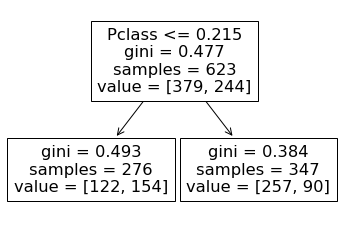

In [66]:
from sklearn.tree import plot_tree 
plot_tree(model_dt.named_steps.model, feature_names=X_train.columns);

In [73]:
pipe_adb_rf = Pipeline(steps=[
    ('prep', prep),
    # equivalente al Bagging Classifier, pero hace boosting... permite cualquier modelo...
    ('model', AdaBoostClassifier(   base_estimator=RandomForestClassifier(n_estimators = 5, max_depth = 1), 
                                    random_state=123, 
                                    n_estimators=100,  # hace que el modelo se demore más
                                    learning_rate=1))
])

# Adaboost: este es un boosting de baggins
train_function(pipe_adb_rf, X_train, X_test, y_train, y_test)


train
              precision    recall  f1-score   support

           0     0.7483    0.8707    0.8049       379
           1     0.7308    0.5451    0.6244       244

    accuracy                         0.7432       623
   macro avg     0.7395    0.7079    0.7146       623
weighted avg     0.7414    0.7432    0.7342       623

test
              precision    recall  f1-score   support

           0     0.7611    0.8059    0.7829       170
           1     0.6250    0.5612    0.5914        98

    accuracy                         0.7164       268
   macro avg     0.6931    0.6836    0.6871       268
weighted avg     0.7113    0.7164    0.7128       268



Pipeline(steps=[('prep',
                 Pipeline(steps=[('num_imp',
                                  MeanMedianImputer(imputation_method='mean')),
                                 ('sc', StandardScaler())])),
                ('model',
                 AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=1,
                                                                          n_estimators=5),
                                    learning_rate=1, n_estimators=100,
                                    random_state=123))])

In [97]:
pipe_adb_gb = Pipeline(steps=[
    ('prep', prep),
    # equivalente al Bagging Classifier, pero hace boosting... permite cualquier modelo...
    ('model', GradientBoostingClassifier( 
                                    # random_state=123, 
                                    max_depth = 5,
                                    n_estimators = 5,  # hace que el modelo se demore más
                                    # learning_rate=1
                                    ))
])

# Adaboost: este es un boosting de baggins
train_function(pipe_adb_gb, X_train, X_test, y_train, y_test)

train
              precision    recall  f1-score   support

           0     0.7174    0.9578    0.8203       379
           1     0.8632    0.4139    0.5596       244

    accuracy                         0.7448       623
   macro avg     0.7903    0.6859    0.6899       623
weighted avg     0.7745    0.7448    0.7182       623

test
              precision    recall  f1-score   support

           0     0.7311    0.9118    0.8115       170
           1     0.7321    0.4184    0.5325        98

    accuracy                         0.7313       268
   macro avg     0.7316    0.6651    0.6720       268
weighted avg     0.7315    0.7313    0.7095       268



Pipeline(steps=[('prep',
                 Pipeline(steps=[('num_imp',
                                  MeanMedianImputer(imputation_method='mean')),
                                 ('sc', StandardScaler())])),
                ('model',
                 GradientBoostingClassifier(max_depth=5, n_estimators=5))])

In [123]:
from sklearn.naive_bayes import GaussianNB
pipe_adb_nb = Pipeline(steps=[
    ('prep', prep),
    # equivalente al Bagging Classifier, pero hace boosting... permite cualquier modelo...
    ('model', AdaBoostClassifier(
                                base_estimator=GaussianNB(priors=[0.6, 0.4]),
                                random_state=123,
                                n_estimators=400,  # hace que el modelo se demore más
                                learning_rate=.8))
])

# Adaboost: este es un boosting de baggins
train_function(pipe_adb_nb, X_train, X_test, y_train, y_test)


train
              precision    recall  f1-score   support

           0     0.6163    1.0000    0.7626       379
           1     1.0000    0.0328    0.0635       244

    accuracy                         0.6212       623
   macro avg     0.8081    0.5164    0.4130       623
weighted avg     0.7666    0.6212    0.4888       623

test
              precision    recall  f1-score   support

           0     0.6415    1.0000    0.7816       170
           1     1.0000    0.0306    0.0594        98

    accuracy                         0.6455       268
   macro avg     0.8208    0.5153    0.4205       268
weighted avg     0.7726    0.6455    0.5175       268



Pipeline(steps=[('prep',
                 Pipeline(steps=[('num_imp',
                                  MeanMedianImputer(imputation_method='mean')),
                                 ('sc', StandardScaler())])),
                ('model',
                 AdaBoostClassifier(base_estimator=GaussianNB(priors=[0.6,
                                                                      0.4]),
                                    learning_rate=0.8, n_estimators=400,
                                    random_state=123))])

In [125]:
X = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare','Sex', 'Embarked']]
y = df.Survived

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

X_train.shape, X_test.shape

((712, 7), (179, 7))

In [126]:
from feature_engine.imputation import CategoricalImputer, MeanMedianImputer
from feature_engine.encoding import OneHotEncoder, OrdinalEncoder ## Árboles les gusta el OrdinalEncoder
from feature_engine.wrappers import SklearnTransformerWrapper


In [132]:
prep_full = Pipeline(steps=[
    ('cat_imp', CategoricalImputer(imputation_method='frequent')),
    ('num_imp',MeanMedianImputer(imputation_method='mean')),
    ('oe', OrdinalEncoder(encoding_method='ordered')),
    ('sc', SklearnTransformerWrapper(StandardScaler(), variables = ['SibSp', 'Parch', 'Fare', 'Age']))
])

prep_full.fit_transform(X_train, y_train)


,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked
PassengerId,,,,,,,
330,1,-1.086485,-0.460103,0.829588,0.490420,1,2
750,3,0.091668,-0.460103,-0.474312,-0.472168,0,1
204,3,1.230549,-0.460103,-0.474312,-0.482229,0,2
422,3,-0.693768,-0.460103,-0.474312,-0.472488,0,1
98,1,-0.536681,-0.460103,0.829588,0.593505,0,2
...,...,...,...,...,...,...,...
99,2,0.327298,-0.460103,0.829588,-0.179919,1,0
323,2,0.013124,-0.460103,-0.474312,-0.384014,1,1
383,3,0.170211,-0.460103,-0.474312,-0.468815,0,0


In [137]:
pipe = Pipeline(steps=[
    ('prep', prep_full),
    ('model', GradientBoostingClassifier(n_estimators=50, learning_rate=0.5, max_depth=3, random_state=123))
])

params = {
    'model__n_estimators': [10, 50, 100, 200, 500],
    'model__learning_rate': [0.01, 0.1, 0.5, 1],
    'model__max_depth': [1,2,3,4,5]
}

search = GridSearchCV(pipe, params, cv = 5, scoring='accuracy', n_jobs=-1)
search.fit(X_train, y_train)

best_model = search.best_estimator_
train_function(best_model,X_train,X_test, y_train, y_test)

train
              precision    recall  f1-score   support

           0     0.8490    0.9563    0.8995       435
           1     0.9144    0.7329    0.8136       277

    accuracy                         0.8694       712
   macro avg     0.8817    0.8446    0.8565       712
weighted avg     0.8744    0.8694    0.8661       712

test
              precision    recall  f1-score   support

           0     0.8607    0.9211    0.8898       114
           1     0.8421    0.7385    0.7869        65

    accuracy                         0.8547       179
   macro avg     0.8514    0.8298    0.8384       179
weighted avg     0.8539    0.8547    0.8524       179



Pipeline(steps=[('prep',
                 Pipeline(steps=[('cat_imp',
                                  CategoricalImputer(imputation_method='frequent')),
                                 ('num_imp',
                                  MeanMedianImputer(imputation_method='mean')),
                                 ('oe', OrdinalEncoder()),
                                 ('sc',
                                  SklearnTransformerWrapper(transformer=StandardScaler(),
                                                            variables=['SibSp',
                                                                       'Parch',
                                                                       'Fare',
                                                                       'Age']))])),
                ('model',
                 GradientBoostingClassifier(learning_rate=0.01, max_depth=4,
                                            n_estimators=200,
                                            random_state=123))])

In [136]:
pd.DataFrame(search.cv_results_).query('rank_test_score == 1')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__learning_rate,param_model__max_depth,param_model__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
15,0.50756,0.023081,0.0261,0.004196,0.01,4,200,"{'model__learning_rate': 0.01, 'model__max_dep...",0.811189,0.825175,0.816901,0.838028,0.859155,0.83009,0.017106,1


In [141]:
prep_full_v2 = Pipeline(steps=[
    ('cat_imp', CategoricalImputer(imputation_method='frequent')),
    ('num_imp',MeanMedianImputer(imputation_method='mean')),
    ('oe', OrdinalEncoder()),
    ('sc', SklearnTransformerWrapper(StandardScaler(), variables = ['SibSp', 'Parch', 'Fare', 'Age']))
])

pipe_v2 = Pipeline(steps=[
    ('prep', prep_full_v2),
    ('model', GradientBoostingClassifier(n_estimators=50, learning_rate=0.5, max_depth=3, random_state=123))
])

params = {
    'model__n_estimators': [10, 50, 100, 200, 500],
    'model__learning_rate': [0.01, 0.1, 0.5, 1],
    'model__max_depth': [1,2,3,4,5],
    'prep__num_imp__imputation_method': ['mean', 'median'],
    'prep__cat_imp__imputation_method': ['frequent', 'missing'],
    'prep__oe__encoding_method': ['arbitrary', 'ordered'],
    'prep__sc':[SklearnTransformerWrapper(StandardScaler(), variables = ['SibSp', 'Parch', 'Fare', 'Age']), 'passthrough']
}

search_v2 = GridSearchCV(pipe_v2, params, cv = 5, scoring='accuracy', n_jobs=-1)
search_v2.fit(X_train, y_train)

best_model_v2 = search_v2.best_estimator_
train_function(best_model_v2,X_train,X_test, y_train, y_test)

train
              precision    recall  f1-score   support

           0     0.8584    0.9333    0.8943       435
           1     0.8787    0.7581    0.8140       277

    accuracy                         0.8652       712
   macro avg     0.8685    0.8457    0.8541       712
weighted avg     0.8663    0.8652    0.8630       712

test
              precision    recall  f1-score   support

           0     0.8632    0.8860    0.8745       114
           1     0.7903    0.7538    0.7717        65

    accuracy                         0.8380       179
   macro avg     0.8268    0.8199    0.8231       179
weighted avg     0.8368    0.8380    0.8371       179



Pipeline(steps=[('prep',
                 Pipeline(steps=[('cat_imp', CategoricalImputer()),
                                 ('num_imp',
                                  MeanMedianImputer(imputation_method='mean')),
                                 ('oe', OrdinalEncoder()),
                                 ('sc', 'passthrough')])),
                ('model',
                 GradientBoostingClassifier(n_estimators=50,
                                            random_state=123))])

In [139]:
pd.DataFrame(search_v2.cv_results_).query('rank_test_score == 1')


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__learning_rate,param_model__max_depth,param_model__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
18,0.57057,0.054338,0.025673,0.004791,0.01,4,200,"{'model__learning_rate': 0.01, 'model__max_dep...",0.825175,0.825175,0.816901,0.838028,0.859155,0.832887,0.014771,1


In [142]:
search.best_params_

{'model__learning_rate': 0.01,
 'model__max_depth': 4,
 'model__n_estimators': 200}

In [143]:
search_v2.best_params_

{'model__learning_rate': 0.1,
 'model__max_depth': 3,
 'model__n_estimators': 50,
 'prep__cat_imp__imputation_method': 'missing',
 'prep__num_imp__imputation_method': 'mean',
 'prep__oe__encoding_method': 'ordered',
 'prep__sc': 'passthrough'}

In [144]:
search.best_score_

0.830089628681178

In [145]:
search_v2.best_score_

0.8342657342657344